In [190]:
# package imports
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials

# data import

file = './hw_feature_engineering.xlsx'
housing = pd.read_excel(io     = file,
                        header = 0   )

<br>

<strong>Feature 1: Housing Features Score</strong>

1-a)

This feature is engineered by summing the normalized counts of full baths, kitchens, garages, and total number of rooms into a score ranging from 0 to 4. We expect a strong positive correlation with Sale_Price and log_Sale_Price, as homes with more features tend to enhance both livability and market value. Full baths, kitchens, and garages each play a crucial role in making a home more suitable for multi-family or shared living, even when only one additional unit is added. In contrast, the effect of an additional room is assumed to be relatively smaller, requiring multiple extra rooms to achieve a similar impact as the other three utilities. Normalizing each component ensures that these differences in impact are properly accounted for in the final score.

1-b)

Homes with multiple full baths, kitchens, and garages provide significant value, making them highly desirable in the real estate market. A well-equipped kitchen enhances daily convenience, and a garage provides secure parking and extra storage. Both features improve functionality and appeal to buyers. Kitchen remodels can increase home prices by about 5%, and adding a garage can boost value by 5% to 20% (Williams, 2021; Coach House Garages, 2024). While extra bedrooms add value, their impact is often smaller than that of bathrooms, which directly improve daily usability and convenience (Williams, 2021; Welgemoed, 2023).

<strong>Feature 2: Aesthetic Appeal Score</strong>

2-a)

We assume that having masonry veneer, porches, and fireplaces in a house creates a luxurious and visually appealing atmosphere, leading to a strong positive impact on both Sale_Price and log_Sale_Price. Homes with these features tend to have higher perceived value, as buyers associate aesthetic and architectural enhancements with luxury designs. In order to measure the Aesthetic Appeal Score, binary scoring method is used, where each feature (masonry veneer, porches, fireplaces) is assigned 1 regardless of size and number, and 0 for none. These values are then summed to create an Aesthetic Appeal Score (0 to 3).

2-b)

Added decorations and features often increase home value, and this trend continues even when the features are more about appearance than function. Stone veneers, for example, provide one of the best returns on investment, with homeowners recovering 102.3% of the cost on average (Rapp, 2023). Fireplaces, while no longer essential for heating, can make homes more appealing and boost prices by 13%, especially in colder areas (Tan, 2022). Porches also add value, particularly when designed well for comfort and usability, with screened porches offering a 75% return on investment and being especially popular in mid-range homes (Moylan, 2022).

<strong>Feature 3: Available Storage Area</strong>

3-a)

We hypothesize that this feature will have a strong positive correlation with Sale_Price and log_Sale_Price, as homes with more storage offer greater functionality and convenience. This feature is engineered by calculating total storage space (basement + garage) and subtracting the occupied space, which is determined based on garage capacity using a standard parking space size of 162 square feet (Burdon, 2023). Larger available storage areas make a home more appealing, increasing demand and leading to higher sale prices.

3-b)

In real estate, storage space is a crucial selling point for potential homebuyers. Homes with ample storage are more attractive because they allow residents to organize their belongings efficiently and maintain a clutter-free living space. According to Coach House Garages (2023), homes with garages generally command higher prices than similar homes without them. Additionally, properties with basements and garages usually see a price increase of 10% to 20% compared to those without (Oliver, 2023). Buyers often pay a premium for homes with well-designed storage solutions, such as spacious basements and garages, which improve overall home functionality.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Coding New Features</h3><br>

In [191]:
## Feature 1 ## Housing Features Score

# normalizing each category and summing up as a new score
Housing_Features_Score =   housing["Full_Bath"] / housing["Full_Bath"].max()\
                         + housing["Kitchen_AbvGr"] / housing["Kitchen_AbvGr"].max()\
                         + housing["TotRms_AbvGr"] / housing["TotRms_AbvGr"].max()\
                         + housing["Garage_Cars"] / housing["Garage_Cars"].max()

# augmenting new feature to housing dataset
housing["Housing_Features_Score"] = Housing_Features_Score

# checking results
housing["Housing_Features_Score"].head(n = 5)

0    0.850000
1    0.983333
2    0.716667
3    0.916667
4    0.916667
Name: Housing_Features_Score, dtype: float64

<br>

In [192]:
## Feature 2 ## Aesthetic Appeal Score

# adding new columns related to aesthetic appeal and filling it with 0 value.
housing['has_Mas_Vnr']    = 0
housing['has_Porch']      = 0
housing["has_fire_place"] = 0

# iterating over each original column to change values in the new feature columns
for index, value in housing.iterrows():

    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:     # If Mas_Vnr_Area is higher than 0,
        housing.loc[index, 'has_Mas_Vnr'] = 1      # we consider there is at least 1 Vnr.
        
    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:       # If Porch_Area is higher than 0,
        housing.loc[index, 'has_Porch'] = 1        # we consider there is at least 1 porch.
        
    # Fireplaces
    if housing.loc[index, 'Fireplaces'] > 0:       # If there is at least 1 fireplace,
        housing.loc[index, 'has_fire_place'] = 1   # we consider the place has fireplace rather than 
                                                   # having exact number to keep the calculation consistent.

# first 5 rows to check data        
housing[['has_Mas_Vnr', 'has_Porch', 'has_fire_place']].head(n = 5)

,has_Mas_Vnr,has_Porch,has_fire_place
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [193]:
# calculating Aesthetic Appeal Score using binary variables
Aesthetic_Appeal_Score = (housing['has_Mas_Vnr'] + 
                          housing['has_Porch']   + 
                          housing['has_fire_place'])

# augmenting new feature to housing dataset
housing["Aesthetic_Appeal_Score"] = Aesthetic_Appeal_Score

# first 5 rows to check data
housing[['Aesthetic_Appeal_Score']].head(n = 5)

,Aesthetic_Appeal_Score
0,1
1,0
2,0
3,1
4,1


In [194]:
# making sure each score has at least 100 observations
housing[['Aesthetic_Appeal_Score']].value_counts().sort_index()

Aesthetic_Appeal_Score
0                         260
1                         959
2                         979
3                         732
Name: count, dtype: int64

<br>

In [195]:
## Feature 3 ## Available Storage Area

# calculating Total_Storage_Area by summing "Total_Bsmt_SF" and "Garage_Area"
Total_Storage_Area = housing[["Total_Bsmt_SF", "Garage_Area"]].sum(axis = 1)

# calculating Occupied_Storage_Area by multiplying garage cars by the standard parking space area (162 sq.ft.) 
Occupied_Storage_Area = housing["Garage_Cars"] * 162

# calculating Available_Storage_Area by subtracting Occupied_Storage_Area from Total_Storage_Area
housing["Available_Storage_Area"] = Total_Storage_Area - Occupied_Storage_Area

# checking results
housing["Available_Storage_Area"].head(n = 5)

0    720
1    600
2      0
3    245
4      0
Name: Available_Storage_Area, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Check the Results</h3><br>
Developing visualization to show the linear relationships between new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

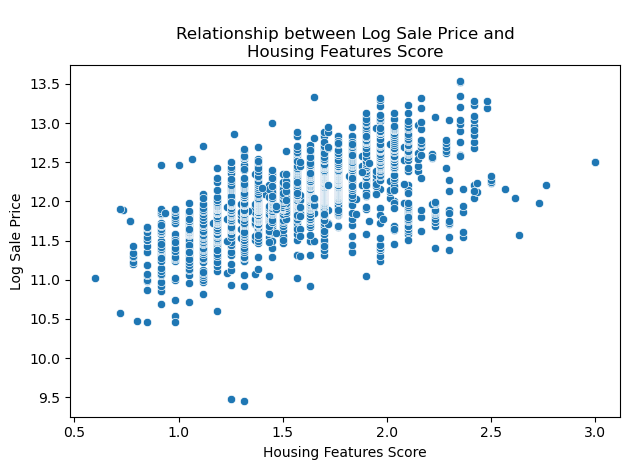

In [196]:
## Scatterplot - Feature 1 ## Housing Features Score

# developing a scatterplot
sns.scatterplot(x = 'Housing_Features_Score', 
                y = 'log_Sale_Price', 
                data = housing)

# title and labels
plt.title(label   = """
Relationship between Log Sale Price and
Housing Features Score""")
plt.xlabel(xlabel = 'Housing Features Score')
plt.ylabel(ylabel = 'Log Sale Price')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<br>

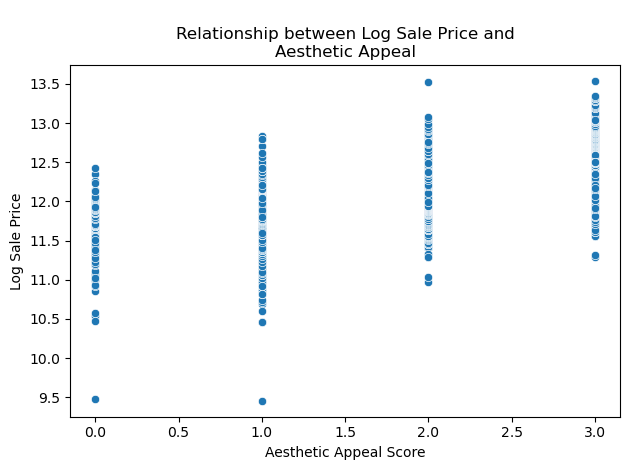

In [197]:
## Scatterplot - Feature 2 ## Aesthetic Appeal Score

# developing a scatterplot
sns.scatterplot(x = 'Aesthetic_Appeal_Score', 
                y = 'log_Sale_Price', 
                data = housing)

# title and labels
plt.title(label   = """
Relationship between Log Sale Price and
Aesthetic Appeal""")
plt.xlabel(xlabel = 'Aesthetic Appeal Score')
plt.ylabel(ylabel = 'Log Sale Price')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


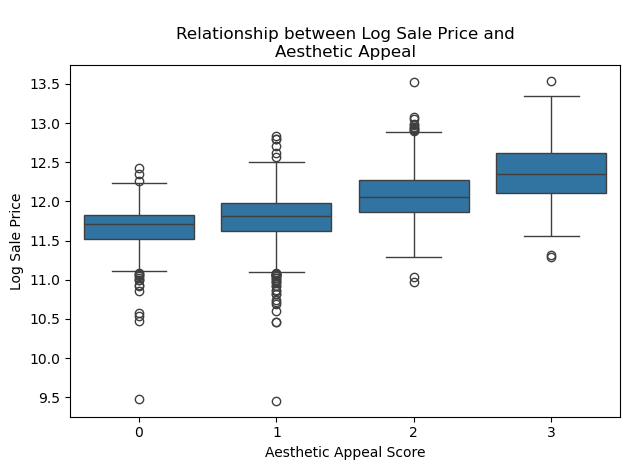

In [198]:
# Since a scatterplot is not ideal for illustrating the distribution of Log Sale Price,
# we decided to use a boxplot instead.

# developing a boxplot
sns.boxplot(x = 'Aesthetic_Appeal_Score', 
                y = 'log_Sale_Price', 
                data = housing)

# title and labels
plt.title(label   = """
Relationship between Log Sale Price and
Aesthetic Appeal""")
plt.xlabel(xlabel = 'Aesthetic Appeal Score')
plt.ylabel(ylabel = 'Log Sale Price')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<br>

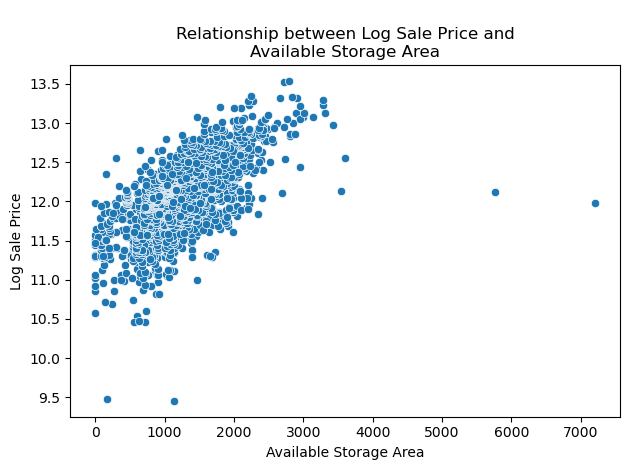

In [199]:
## Scatterplot - Feature 3 ## Available Storage Area

# developing a scatterplot
sns.scatterplot(x     = 'Available_Storage_Area',
                y     = 'log_Sale_Price',
                data  = housing)


# title and labels
plt.title(label   = """
Relationship between Log Sale Price and
Available Storage Area""")
plt.xlabel(xlabel = "Available Storage Area")
plt.ylabel(ylabel = "Log Sale Price")


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<br>

In [200]:
## Correlations ##

# developing a small correlation matrix
new_corr = housing.corr(method = 'pearson').round(decimals = 3)

# checking the correlations of the newly-created variables with Sale_Price & log_Sale_Price
new_corr.loc[ ['Housing_Features_Score', 'Aesthetic_Appeal_Score', 'Available_Storage_Area'],
              ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                             ascending = False)

,Sale_Price,log_Sale_Price
Available_Storage_Area,0.669,0.661
Housing_Features_Score,0.649,0.672
Aesthetic_Appeal_Score,0.567,0.600


<em>Use this markdown cell for Step 4.</em>

<strong>Feature 1: Housing Features Score</strong>

1-a)

The Housing Features Score showed a strong positive correlation of more than 0.6 with Sale_Price and log_Sale_Price, as expected. In particular, a significant increase in the correlation coefficient was observed for log_Sale_Price, which may indicate that housing features, such as the number of kitchens, bathrooms and garages, play a consistently important role in the low to high price range of homes.

1-b)

While the number of kitchens is an important factor, considering their quality and condition could provide additional insights into property value. Incorporating an overall quality and condition term converted to a scale of 0 to 1 may strengthen the correlation between home features and market value. For example, a renovated state-of-the-art kitchen attracts more buyers, highlighting both kitchen quality and condition key factors in driving higher prices. As Gehman (2024) states, "The home’s condition, particularly the state of integral rooms such as the kitchen, is a key determinant" of market value, and "its condition, design, and functionality can either increase or decrease the market value of the property." This highlights why buyers prioritize modern design, high-quality appliances, ample storage, and functional layouts, all of which contribute to a kitchen’s overall impact on home value.

<strong>Feature 2 Aesthetic Appeal Score</strong>

2-a)

As expected, the Aesthetic Appeal Score has a strong positive correlation with both Sale_Price and log_Sale_Price. Although both correlation coefficients are very similar, using log_Sale_Price for the model is ideal because it reduces skewness in Sale_Price, preventing expensive houses from disproportionately influencing the average.

2-b)

The impact of masonry veneer, porches, and fireplaces on home value is not the same. Therefore, assigning appropriate weights of impact based on market trends could better illustrate their effect on the sale price. Masonry veneer consistently adds value regardless of location, making it the most significant contributor to the Aesthetic Appeal Score. On the other hand, fireplaces increase home prices by 13% in some regions (Tan, 2022), but their impact could vary depending on the type of home. Although fireplaces in luxury homes are expected and add some value to the home's aesthetic, they are not prioritized (Kaifrin, 2020). Therefore, fireplaces should have a lower weight than veneer. Similarly, porches can increase home value, their contribution is highly dependent on design, functionality, and location (13 Ten Renovations, 2025). Unlike fireplaces, which primarily serve a decorative purpose, porches offer customizable outdoor living spaces that buyers value differently based on climate and buyer preferences. Therefore,  incorporating weighted values could make the model much more accurate. However, masonry veneer and porches are recorded in square footage, while fireplaces are measured as a count. This difference in measurement units creates inconsistencies if a linear weighting system is applied directly. Due to this inconsistency, a simple summation scoring method (0 for absence, 1 for presence) was used instead. Unfortunately, scoring and weighting methods cannot be combined because multiplying a score of 0 or 1 by a weight does not alter the correlation value. Therefore, if a weighted approach were to be used instead of scoring, fireplaces would need to be removed from the Aesthetic Appeal feature to maintain consistency in measurement units and avoid distorting the feature's relationship with sale price.

<strong>Feature 3: Available Storage Area</strong> 

3-a)

The 'Available_Storage_Area' feature performed as expected, showing a relatively strong positive correlation with 'Sale_Price' (0.67) and 'log_Sale_Price' (0.66). These findings align with the hypothesis that homes with more available storage space tend to be priced higher, as buyers likely perceive additional storage as a valuable feature.

3-b)

One practical approach to strengthening the relationship between 'Available_Storage_Area' and 'Sale_Price' is to examine the correlation with the total storage area, including parking spaces. This is because the size of parking spaces can also contribute to increasing property value. Parking spaces were previously regarded as already occupied and excluded from the analysis. However, reconsidering their role could lead to a more accurate assessment of their impact on property value. Residents have the flexibility to use parking spaces for vehicle storage or other purposes. A larger total storage area, including parking spaces, allows for more flexible use, which is likely to have a positive impact on 'Sale_Price'.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>References</h3>

<strong>Feature 1</strong>

Williams, D. (2021, February 6). 6 features that determine a home's final sale price. Money. Retrieved from https://money.com/how-to-price-a-home/

Coach House Garages. (2024, July 17). The resale value of adding a garage: Is it worth the investment? Retrieved from https://coachhousegarages.com/the-resale-value-of-adding-a-garage-is-it-worth-the-investment/

Welgemoed, E. (2023, November 24). How much value does an extra bedroom add? New Silver. Retrieved from https://newsilver.com/the-lender/how-much-value-does-an-extra-bedroom-add/

Gehman, D. (2024, September 17). The impact of a kitchen remodel on your home’s value. Gehman Remodeling. Retrieved from https://www.gehmanremodeling.com/the-impact-of-a-kitchen-remodel-on-your-homes-value/

<strong>Feature 2</strong>

Rapp, J. (2023, November 8). Best home improvements to increase value. Zillow. https://www.zillow.com/learn/best-home-improvements-to-increase-value/

Tan, H. (2022, February 28). 3 reasons why adding a fireplace can increase your home’s value. Redfin. https://www.redfin.com/blog/adding-a-fireplace-can-increase-home-value/

Moylan, J. (2022, June 1). 7 tips to get the best return on investment on a screened-in porch. Design Builders Inc. https://www.designbuildersmd.com/blog/7-tips-to-get-the-best-return-on-investment-on-a-screened-in-porch

Kaifrin, V. (2020, November 30). Fireplaces don’t add value like they once did, but you can still enjoy one. HomeLight. https://www.homelight.com/blog/does-adding-a-fireplace-increase-home-value/

13 Ten Renovations. (2025). Does a porch improve home value? 13 | TEN Renovations. https://13tenrenovations.com/does-a-porch-improve-home-value/

<strong>Feature 3</strong>

Burdon, J. (2023, December 11). What are the standard parking space dimensions? Asphalt Kingdom. https://blog.asphaltkingdom.com/standard-parking-space-dimensions

Coach House Garages. (2024, July 17). The resale value of adding a garage: Is it worth the investment? Retrieved from https://coachhousegarages.com/the-resale-value-of-adding-a-garage-is-it-worth-the-investment/

Oliver, J. (2023). Investment value: Pros and cons of a house without a basement. Amazing Architecture. https://amazingarchitecture.com/articles/investment-value-pros-and-cons-of-a-house-without-a-basement